In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import re
from scipy.sparse import csr_matrix

print(pd.__version__)

0.24.2


# Pre-processing

In [81]:
df = pd.read_csv("pokemon_revised.csv", encoding='utf-8')

# Drop extra indentifiers (Redundant information)
df = df.drop('japanese_name', 1)
df = df.drop('classfication', 1)
#df = df.drop('pokedex_number', 1)

In [82]:
# Combine dataframes
def append_df(df1, df2):
    for col in df1:
        df2[col] = df1[col]
    return df2

# One-hot encoding on Pokemon abilities
def expand_abilities(df):
    clean_abilities = df['abilities'].apply(lambda x: re.findall('(?<=\')[^,].+?(?=\')', x))
    abilities = np.hstack(clean_abilities.values)
    p_array = np.array(clean_abilities)

    # Building term-document matrix
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
    indptr = [0]
    indices = []
    data = []
    vocab = {}

    for pkmn in p_array:
        for abil in pkmn:
            index = vocab.setdefault(abil, len(vocab))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    one_hot = csr_matrix((data, indices, indptr), dtype=int).toarray()
    
    inv_vocab = {v: k for k, v in vocab.items()}
    ordered_abil = [inv_vocab[x] for x in range(len(vocab.keys()))]
    df2 = pd.DataFrame()
    df2[ordered_abil] = pd.DataFrame(one_hot)
    return df2

In [83]:
oha = expand_abilities(df)
df = df.drop('abilities', 1)
df = append_df(oha, df)
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Aerilate,Zen Mode,Surge Surfer,Tangling Hair,Galvanize,Power of Alchemy,Lightning Rod,Primordial Sea,Desolate Land,Delta Stream
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# One-hot encoding the element typing
def one_hot_types(df):
    primary_type = pd.get_dummies(df['type1'])
    secondary_type = pd.get_dummies(df['type2'])
    both_type = primary_type + secondary_type
    df = df.drop('type1', 1)
    df = df.drop('type2', 1)
    return append_df(both_type, df)

In [85]:
df = one_hot_types(df)
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,1,0,0,0,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,1,0,0,0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,1,0,0,0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# One hot encode the generation number
def expand_gen(df):
    gen_num = pd.get_dummies(df['generation'])
    df = df.drop('generation', 1)
    df = append_df(gen_num, df)
    df.rename(columns = {i: "gen_%s" % str(i) for i in range(1,8)}, inplace = True )
    return df

In [87]:
df = expand_gen(df)
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,rock,steel,water,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,1,0,0,0,0,0,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,1,0,0,0,0,0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,1,0,0,0,0,0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,1,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,1,0,0,0,0,0,0


In [88]:
# Create new feature: sum of weakness multipliers to convey overall weakness
def create_weakness(df):
    re_against = re.compile("^against_.+$")
    against_ = [x for x in df.columns.values if re_against.match(x)]
    df['weakness'] = df[against_].sum(axis=1)
    return df

In [89]:
df = create_weakness(df)
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,steel,water,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,weakness
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,1,0,0,0,0,0,0,19.25
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,1,0,0,0,0,0,0,19.25
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,1,0,0,0,0,0,0,19.25
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,1,0,0,0,0,0,0,18.00
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,1,0,0,0,0,0,0,18.00


In [90]:
# One hot encode the weakness multipliers
def expand_against(df):
    re_against = re.compile("^against_.+$")
    against_ = [x for x in df.columns.values if re_against.match(x)]
    for item in against_:
        effective = pd.get_dummies(df[item])
        effective.rename(columns = {val: "%s_%s" % (item, val) for val in effective.columns}, inplace = True)
        df = df.drop(item, 1)
        df = append_df(effective, df)
    return df

In [91]:
df = expand_against(df)
df.head()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,is_legendary,...,against_steel_0.25,against_steel_0.5,against_steel_1.0,against_steel_2.0,against_steel_4.0,against_water_0.25,against_water_0.5,against_water_1.0,against_water_2.0,against_water_4.0
0,49,5120,70,318,45,49,1059860,0.7,45,0,...,0,0,1,0,0,0,1,0,0,0
1,62,5120,70,405,45,63,1059860,1.0,60,0,...,0,0,1,0,0,0,1,0,0,0
2,82,5120,70,525,45,83,1059860,2.0,80,0,...,0,0,1,0,0,0,1,0,0,0
3,52,5120,70,309,45,43,1059860,0.6,39,0,...,0,1,0,0,0,0,0,0,1,0
4,64,5120,70,405,45,58,1059860,1.1,58,0,...,0,1,0,0,0,0,0,0,1,0


In [92]:
# Separate the labels
poke_names = df['name']
legendary_labels = df['is_legendary']
df.drop('name', 1, inplace=True)
df.drop('is_legendary', 1, inplace=True)

In [93]:
# We only have male percentages, but that does not convey the Pokemon with no genders
df['percentage_female'] = 100 - df['percentage_male']
df['percentage_male'].fillna(0, inplace = True)
df['percentage_female'].fillna(0, inplace = True)

# K-means Clustering

Group the Pokemon by power and physical features.

Parameters: 
* n_clusters: How many groups to create
* random_state: Random seed

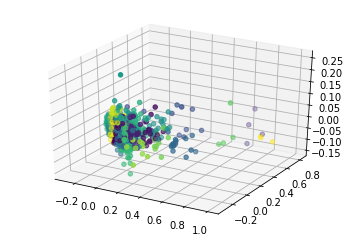

In [67]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

stats = ['pokedex_number', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total', 'height_m', 'weight_kg', 'weakness']
pca = PCA(n_components=3)
n_clusters = 25

# Group the pokemon
X = df[stats]
kmeans = KMeans(n_clusters=n_clusters, random_state=5).fit(X[stats[1:]])
pred = kmeans.labels_


# PCA to "flatten" data for visualization
pca.fit(X[stats[1:]]) 
X_pca = pca.transform(X[stats[1:]])
X_pca = X_pca - np.mean(X_pca)
X_pca = X_pca / np.max(X_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_pca[:,0], ys=X_pca[:,1], zs=X_pca[:,2], c=pred)

In [68]:
for i in range(n_clusters):
    print("Group", i, ":", list(poke_names[X[pred == i]['pokedex_number'].values - 1]), "\n")

Group 0 : ['Ivysaur', 'Charmeleon', 'Wartortle', 'Butterfree', 'Beedrill', 'Raticate', 'Fearow', 'Gloom', 'Parasect', 'Dugtrio', 'Persian', 'Poliwhirl', 'Kadabra', 'Weepinbell', 'Ponyta', 'Haunter', 'Tangela', 'Seadra', 'Porygon', 'Dragonair', 'Bayleef', 'Quilava', 'Croconaw', 'Furret', 'Ledian', 'Ariados', 'Togetic', 'Azumarill', 'Sunflora', 'Yanma', 'Murkrow', 'Misdreavus', 'Dunsparce', 'Qwilfish', 'Sneasel', 'Corsola', 'Grovyle', 'Combusken', 'Marshtomp', 'Mightyena', 'Linoone', 'Beautifly', 'Dustox', 'Pelipper', 'Vigoroth', 'Delcatty', 'Medicham', 'Plusle', 'Minun', 'Volbeat', 'Illumise', 'Roselia', 'Castform', 'Monferno', 'Prinplup', 'Bibarel', 'Kricketune', 'Wormadam-Plant', 'Mothim', 'Pachirisu', 'Chatot', 'Gabite', 'Rotom', 'Servine', 'Pignite', 'Dewott', 'Watchog', 'Swoobat', 'Gurdurr', 'Palpitoad', 'Archen', 'Gothorita', 'Vanillish', 'Emolga', 'Eelektrik', 'Fraxure', 'Zweilous', 'Quilladin', 'Braixen', 'Frogadier', 'Diggersby', 'Fletchinder', 'Vivillon', 'Dedenne', 'Dartrix',

In [55]:
X2 = X.copy(deep=True)
X2["pokedex_number"]=poke_names

# Example group
X2[pred==6]

,pokedex_number,hp,attack,defense,sp_attack,sp_defense,speed,base_total,height_m,weight_kg,weakness
142,Snorlax,160,110,65,65,110,30,540,2.1,460.0,18.00
207,Steelix,75,85,200,55,65,30,510,9.2,400.0,15.75
305,Aggron,70,110,180,60,60,50,530,2.1,360.0,19.50
320,Wailord,170,90,45,90,45,60,500,14.5,398.0,18.00
475,Probopass,60,55,145,75,150,40,525,1.4,340.0,19.50
484,Heatran,91,90,106,130,106,77,600,1.7,430.0,16.25
712,Avalugg,95,117,184,44,46,28,514,2.0,505.0,21.50
821,Mega Aggron,70,140,230,60,80,50,630,2.2,395.0,15.00
875,Alolan-Exeggutor,95,105,85,125,75,45,530,10.9,415.6,25.25


# Spectral Clustering

A different method of unsupervised grouping

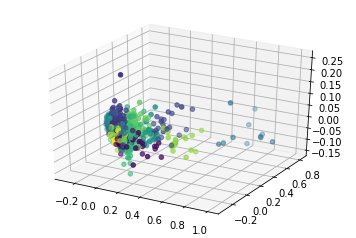

In [69]:
from sklearn.cluster import SpectralClustering

pca = PCA(n_components=3)
n_clusters = 25
X = df[stats]
spec_clust = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=5).fit(X[stats[1:]])
pred = spec_clust.labels_

pca.fit(X[stats[1:]]) 
X_pca = pca.transform(X[stats[1:]])
X_pca = X_pca - np.mean(X_pca)
X_pca = X_pca / np.max(X_pca)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_pca[:,0], ys=X_pca[:,1], zs=X_pca[:,2], c=pred)

In [70]:
for i in range(n_clusters):
    print("Group", i, ":", list(poke_names[X[pred == i]['pokedex_number'].values - 1]), "\n")

Group 0 : ['Pidgeot', 'Raichu', 'Venomoth', 'Victreebel', 'Gengar', 'Seadra', 'Mr. Mime', 'Jynx', 'Electabuzz', 'Magmar', 'Xatu', 'Jumpluff', 'Misdreavus', 'Girafarig', 'Houndoom', 'Pelipper', 'Masquerain', 'Manectric', 'Altaria', 'Chimecho', 'Floatzel', 'Cherrim', 'Lopunny', 'Toxicroak', 'Lumineon', 'Froslass', 'Rotom', 'Phione', 'Simisage', 'Simisear', 'Simipour', 'Whimsicott', 'Lilligant', 'Basculin', 'Swanna', 'Galvantula', 'Accelgor', 'Talonflame', 'Furfrou', 'Meowstic', 'Heliolisk', 'Hawlucha', 'Sliggoo', 'Klefki', 'Oricorio', 'Ribombee', 'Salazzle', 'Mimikyu', 'Minior-Core', 'Alolan-Raichu', 'Alolan-Ninetales'] 

Group 1 : ['Mewtwo', 'Slaking', 'Rayquaza', 'Xerneas', 'Yveltal', 'Solgaleo', 'Lunala', 'Mega Charizard X', 'Mega Charizard Y', 'Mega Blastoise', 'Mega Mewtwo X', 'Mega Mewtwo Y', 'Mega Garchomp', 'Ultra Necrozma', 'Mega-Swampert', 'Mega Salamence', 'Mega-Latias', 'Mega-Latios', 'Mega-Diancie'] 

Group 2 : ['Venusaur', 'Charizard', 'Blastoise', 'Nidoking', 'Golduck', 'T

In [71]:
# Example group
X2[pred==5]

,pokedex_number,hp,attack,defense,sp_attack,sp_defense,speed,base_total,height_m,weight_kg,weakness
75,Golem,80,110,130,55,65,45,485,1.4,300.0,24.25
129,Gyarados,95,125,79,60,100,81,540,6.5,235.0,18.50
142,Snorlax,160,110,65,65,110,30,540,2.1,460.0,18.00
207,Steelix,75,85,200,55,65,30,510,9.2,400.0,15.75
296,Hariyama,144,120,60,40,60,50,474,2.3,253.8,19.50
305,Aggron,70,110,180,60,60,50,530,2.1,360.0,19.50
320,Wailord,170,90,45,90,45,60,500,14.5,398.0,18.00
361,Glalie,80,80,80,80,80,80,480,1.5,256.5,21.50
388,Torterra,95,109,105,75,85,56,525,2.2,310.0,22.00
449,Hippowdon,108,112,118,68,72,47,525,2.0,300.0,19.00


In [24]:
""" 
# Trying random projection/LFA on pokemon types to see if unsupervised learning can learn typings?

from sklearn import random_projection
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=17)
X_sparse_tsvd = tsvd.fit(both_type).transform(both_type)
X_sparse_tsvd.shape

transformer = random_projection.SparseRandomProjection()
#X_new = transformer.fit_transform(both_type)
"""

NameError: name 'both_type' is not defined

# BINARY CLASSIFICATION: 

Trying different methods of predicting if a Pokemon is legendary

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [219]:
def print_misclass(X, y_true, y_pred):
    #match_names = poke_names[X[:,10]-1].values
    miss = X[:,10][y_true != y_pred]
    for i in miss:
        i = int(i)
        if i not in y_true:
            print(poke_names[i-1] + " is not a legendary.")
        else:
            print(poke_names[i-1] + " is a legendary.")

# Standard SVM

In [94]:
design_matrix = df.values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix, legendary_labels, test_size = 0.15, random_state = 200)

Normalized confusion matrix
[[0.99038462 0.00961538]
 [0.18181818 0.81818182]]


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Normalized confusion matrix
[[0.99038462 0.00961538]
 [0.09090909 0.90909091]]


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\bas

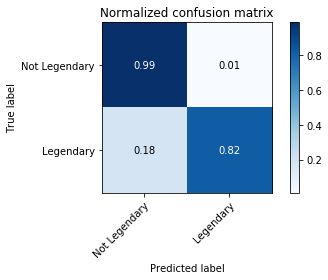

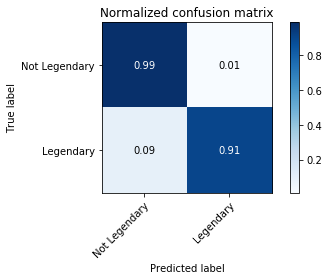

In [101]:
from sklearn.svm import LinearSVC

X2_train, X_val, y2_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.15, random_state = 0)

# Line search for best C parameter; judge by confusion matrix performance
max_acc = 0
searched_C = -1
for c in np.logspace(-10, 10, 25):
    clf = LinearSVC(random_state=0, tol=1e-4, C = c, max_iter=10000)
    clf.fit(X2_train, y2_train)
    pred_val = clf.predict(X_val)
    cm = confusion_matrix(y_val, pred_val)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    val_acc = cm[0][0]+cm[1][1]
    if val_acc > max_acc:
        max_acc=val_acc
        searched_C=c
        plot_confusion_matrix(y_val, pred_val, np.array(['Not Legendary', 'Legendary']), normalize=True)

### Run model of test data

Normalized confusion matrix
[[0.99173554 0.00826446]
 [0.14285714 0.85714286]]


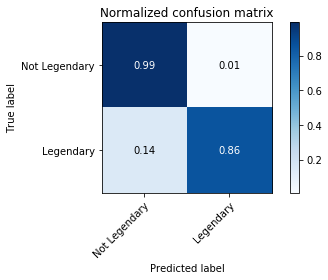

In [209]:
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix, legendary_labels, test_size = 0.15, random_state = 200)
X2_train, X_val, y2_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.15, random_state = 0)

clf = LinearSVC(random_state=0, tol=1e-4, C = searched_C, max_iter=50000)
clf.fit(X2_train, y2_train)
pred_test = clf.predict(X_test)
plot_confusion_matrix(y_test, pred_test, np.array(['Not Legendary', 'Legendary']), normalize=True)

In [220]:
print_misclass(X_test, y_test, pred_test)

Mega-Diancie is not a legendary.
Manaphy is not a legendary.
Silvally is not a legendary.


## RBF Kernelized SVM

Separates data with MVGaussian function

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1.  0. ]
 [0.9 0.1]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


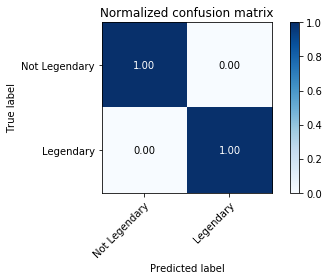

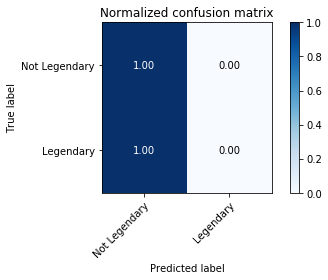

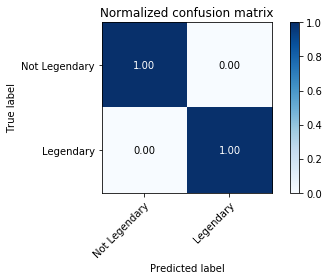

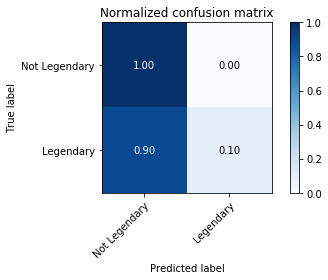

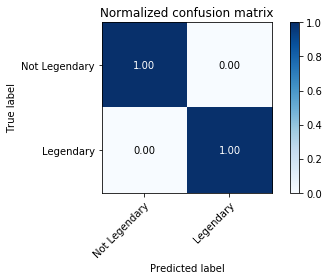

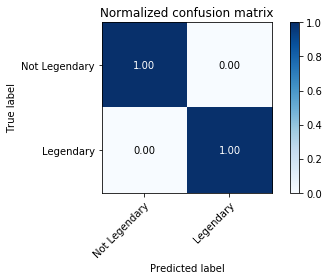

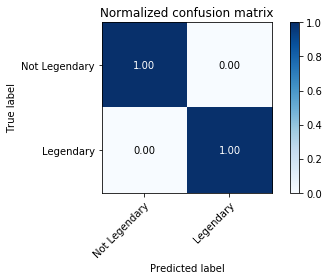

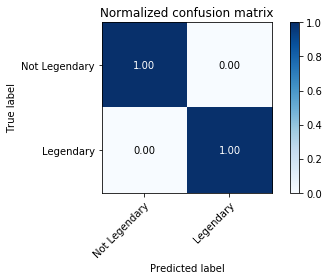

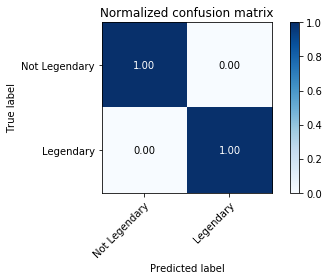

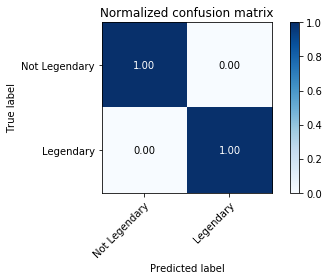

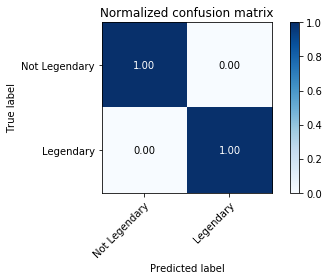

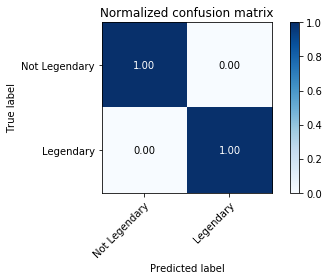

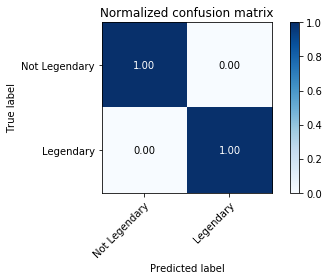

In [221]:
from sklearn.svm import SVC

design_matrix = df.values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix, legendary_labels, test_size = 0.15, random_state = 20)
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train, y_train, test_size = 0.15, random_state = 0)

max_acc = 0
searched_C = -1
for c in np.logspace(-0, 10, 11):
    clf = SVC(C = c, kernel = 'rbf', gamma='auto')
    clf.fit(X_train, y_train)
    
    pred_train = clf.predict(X_train)
    plot_confusion_matrix(y_train, pred_train, np.array(['Not Legendary', 'Legendary']), normalize=True)
    
    pred_validate = clf.predict(X_validate)
    cm = confusion_matrix(y_validate, pred_validate)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    
    validation_acc = cm[0][0]+cm[1][1]
    if validation_acc > max_acc:
        max_acc=validation_acc
        searched_C=c
        plot_confusion_matrix(y_validate, pred_validate, np.array(['Not Legendary', 'Legendary']), normalize=True)

Normalized confusion matrix
[[1.         0.        ]
 [0.85714286 0.14285714]]


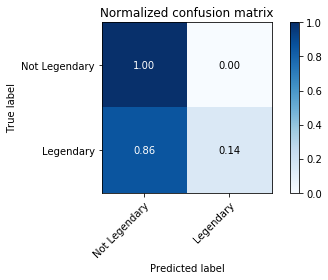

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix, legendary_labels, test_size = 0.15, random_state = 200)
X2_train, X_val, y2_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.15, random_state = 0)

clf = SVC(C = searched_C, kernel = 'rbf', gamma='auto')
clf.fit(X2_train, y2_train)
pred_test = clf.predict(X_test)
plot_confusion_matrix(y_test, pred_test, np.array(['Not Legendary', 'Legendary']), normalize=True)

## Logistic Regression

Fits binary classification as probabilities.

In [224]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

design_matrix = df.values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix, legendary_labels, test_size = 0.4, random_state = 69)

In [225]:
import time

reg = LogisticRegressionCV(Cs=np.logspace(-10, 10, 41), 
                           fit_intercept=True,
                           dual = False,
                          solver='lbfgs',
                           tol=1e-6,
                          max_iter=1e5)

start = time.time()
reg.fit(X_train, y_train)
end = time.time()
print("Fitting took %s ms" % str(end-start))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting took 3.224463939666748 ms


Normalized confusion matrix
[[0.99796748 0.00203252]
 [0.10638298 0.89361702]]
Normalized confusion matrix
[[0.99679487 0.00320513]
 [0.0625     0.9375    ]]


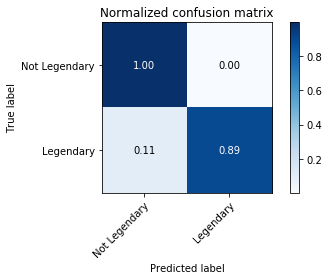

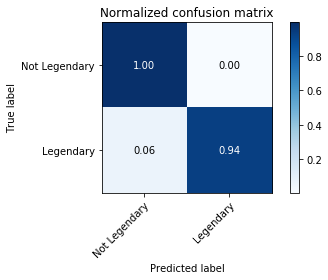

In [226]:
pred_train = reg.predict(X_train)
plot_confusion_matrix(y_train, pred_train, np.array(['Not Legendary', 'Legendary']), normalize=True)

pred_test = reg.predict(X_test)
plot_confusion_matrix(y_test, pred_test, np.array(['Not Legendary', 'Legendary']), normalize=True)

In [227]:
#print_misclass(X_train, y_train, pred_train)
pred_test = reg.predict(X_train)
#print_misclass(X_test, y_test, pred_test)

match_names = poke_names[X_train[:,10]-1].values
pred_test = reg.predict_proba(X_train)
as_prob = np.around(pred_test, decimals=5)[:,1]
for i in range(len(match_names)):
    print('{:>15}: {:.3%}'.format(match_names[i], as_prob[i]))

        Volbeat: 3.740%
      Lilligant: 1.800%
       Sharpedo: 0.473%
     Gothitelle: 1.556%
      Vileplume: 1.121%
        Honedge: 0.941%
     Kricketune: 0.887%
    Mega Pinsir: 0.971%
      Clawitzer: 0.402%
       Stantler: 0.481%
      Mightyena: 0.646%
        Pancham: 1.056%
          Lotad: 0.238%
        Marowak: 1.287%
        Shaymin: 98.895%
         Combee: 0.592%
        Cubchoo: 1.323%
        Roselia: 0.707%
       Tsareena: 1.737%
          Minun: 0.679%
        Cosmoem: 97.762%
      Kricketot: 0.259%
  Deoxys-Normal: 98.132%
        Dartrix: 1.022%
  Mega Gyarados: 0.163%
       Oranguru: 0.658%
        Cradily: 21.270%
       Genesect: 98.380%
       Porygon2: 2.426%
          Bagon: 3.097%
       Medicham: 1.337%
     Type: Null: 98.447%
         Emolga: 0.773%
        Geodude: 0.201%
      Heliolisk: 1.854%
       Hoothoot: 0.288%
      Excadrill: 1.577%
       Simisage: 1.477%
     Mega Absol: 2.878%
       Beheeyem: 1.547%
        Walrein: 1.215%
        Gl

## Decision Trees

Confusion matrix, without normalization
[[690   0]
 [  0  74]]
Confusion matrix, without normalization
[[114   0]
 [  0  21]]


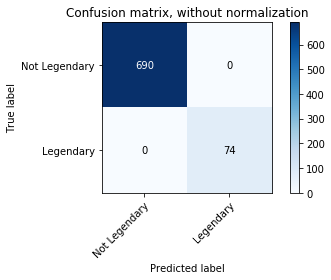

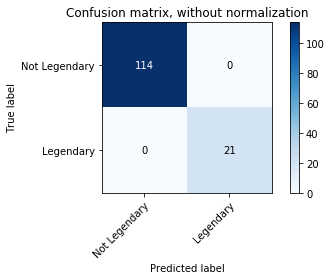

In [228]:
from sklearn import tree
df_copy = df
design_matrix = df_copy.values.astype(np.float32)
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix, legendary_labels, test_size = 0.15, random_state = 69)

clf = tree.DecisionTreeClassifier(min_samples_split =5)
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
plot_confusion_matrix(y_train, pred_train, np.array(['Not Legendary', 'Legendary']), normalize=False)
pred_test = clf.predict(X_test)
plot_confusion_matrix(y_test, pred_test, np.array(['Not Legendary', 'Legendary']), normalize=False)

In [229]:
print_misclass(X_train, y_train, pred_train)
#X_train[:,10]

In [230]:
print_misclass(X_test, y_test, pred_test)

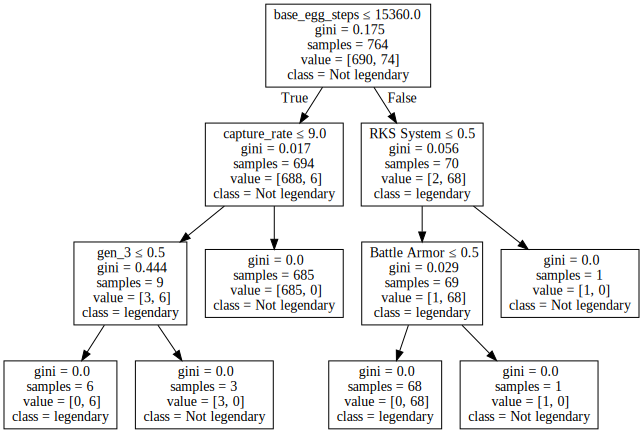

In [231]:
# Decision Tree created
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names = df_copy.columns,
                               class_names=np.array(['Not legendary', 'legendary']),
                               special_characters=True)

graph = graphviz.Source(dot_data) 
graph

## Random Forest


Normalized confusion matrix
[[1.         0.        ]
 [0.02631579 0.97368421]]
Normalized confusion matrix
[[0.99491094 0.00508906]
 [0.01754386 0.98245614]]


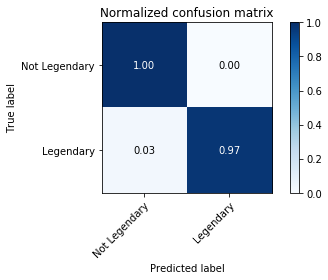

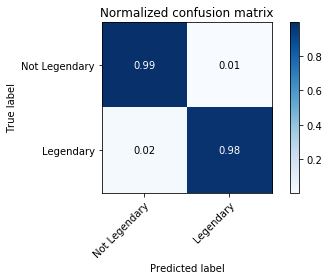

In [232]:
from sklearn.ensemble import RandomForestClassifier
#df_copy = df.drop('base_egg_steps', axis=1)
#df_copy = df_copy.drop('capture_rate', axis=1)
#df_copy = df_copy.drop('pokedex_number', axis=1)
design_matrix = df_copy.values.astype(np.float32)
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix, legendary_labels, test_size = 0.5, random_state = 69)

clf = RandomForestClassifier(n_estimators=5000, 
                             max_depth=2,
                            max_features=100)

clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
plot_confusion_matrix(y_train, pred_train, np.array(['Not Legendary', 'Legendary']), normalize=True)
pred_test = clf.predict(X_test)
plot_confusion_matrix(y_test, pred_test, np.array(['Not Legendary', 'Legendary']), normalize=True)

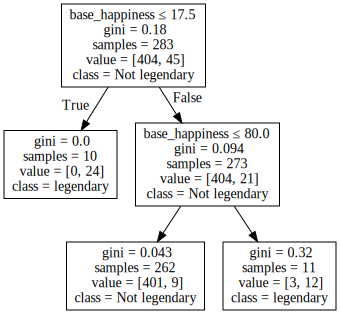

In [233]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf.estimators_[np.random.randint(0,5001)], out_file=None,
                                feature_names = df_copy.columns,
                               class_names=np.array(['Not legendary', 'legendary']),
                               special_characters=True)

graph = graphviz.Source(dot_data) 
graph